## Testing robustness of models

In [17]:
version='v2.11'
norm='minmax'

dump='../../../dump_seeds'

import sys,os
sys.path.append(os.path.abspath('../../src/ml'))
import pandas as pd

In [18]:
results_path='../../../results/score_tables/'

avg_df=pd.read_csv(os.path.join(results_path,f'scores_avg_seeds.csv'))
std_df=pd.read_csv(os.path.join(results_path,f'scores_std_seeds.csv'))
all_df=pd.read_csv(os.path.join(results_path,f'scores_all_seeds.csv'))

In [19]:
avg_df = avg_df[
    ((avg_df['version'] == version) &
    (avg_df['normalization'] == norm) &
    (avg_df['model'] != 'pytorch_mlp') &
    (avg_df['input'].str.contains('protein'))) |
    ((avg_df['input'] == 'gene_expression')
    &     (all_df['model'] != 'pytorch_mlp') 
)
]
all_df = all_df[
    ((all_df['version'] == version) &
    (all_df['normalization'] == norm) &
    (all_df['model'] != 'pytorch_mlp') &
    (all_df['input'].str.contains('protein'))) |
    ((all_df['input'] == 'gene_expression')
    &     (all_df['model'] != 'pytorch_mlp') 
)
]
std_df = std_df[
    ((std_df['version'] == version) &
    (std_df['normalization'] == norm) &
    (std_df['model'] != 'pytorch_mlp') &
    (std_df['input'].str.contains('protein'))) |
    ((std_df['input'] == 'gene_expression')
    &     (std_df['model'] != 'pytorch_mlp')) 
]

/tmp/ipykernel_80600/4193850555.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_df = avg_df[


In [ ]:
all_df=all_df[all_df['input']!='concatenated_protein_embeddings']

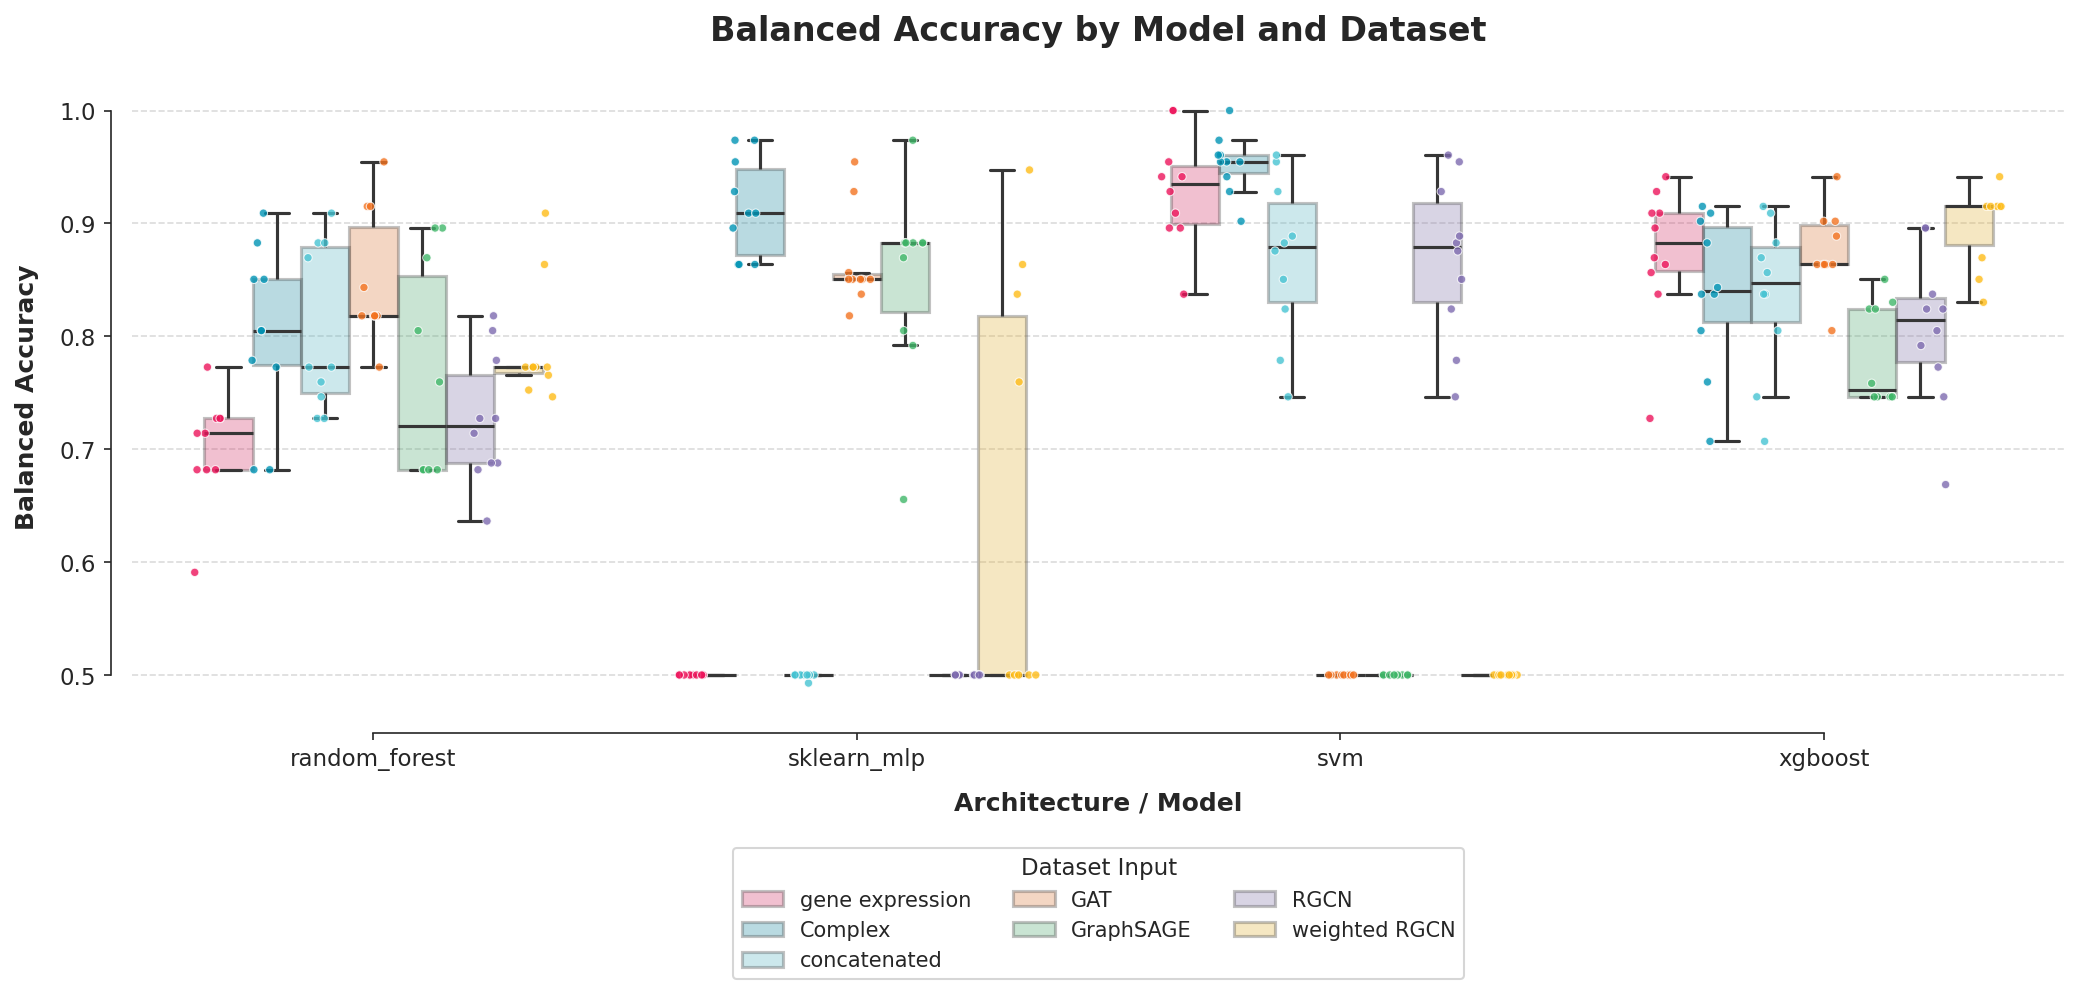

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Setup your provided color mapping
SECONDARY_COLORS = {
    1: "#C60B46", 2: "#ED145B", 3: "#EE3524", 4: "#F37320",
    5: "#7C2A90", 6: "#7D6AAF", 7: "#C6671D", 8: "#FEBC18",
    9: "#004E7D", 10: "#0E87C9", 11: "#0094B5", 12: "#46C3D2",
    13: "#00807A", 14: "#40B769", 15: "#8CC63E", 16: "#D5DF3D"
}

dataset_colors = {
    'gene_expression': SECONDARY_COLORS[2],
    'Complex_protein_embeddings': SECONDARY_COLORS[11],
    'GAT_protein_embeddings': SECONDARY_COLORS[4],
    'GraphSAGE_protein_embeddings': SECONDARY_COLORS[14],
    'RGCN_protein_embeddings': SECONDARY_COLORS[6],
    'weighted_RGCN_protein_embeddings': SECONDARY_COLORS[8],
    'concatenated_protein_embeddings': SECONDARY_COLORS[12]
}

# 2. Plot Configuration
metric = 'balanced_accuracy'
sns.set_style("ticks") # 'ticks' is often preferred for professional papers
plt.rcParams.update({'font.family': 'sans-serif', 'font.size': 11})

fig, ax = plt.subplots(figsize=(14, 7))

# 3. Create Boxplot 
# Note: boxprops and medianprops add that "professional" crispness
sns.boxplot(
    data=all_df,
    x='model',
    y=metric,
    hue='input',
    palette=dataset_colors,
    showfliers=False,
    width=0.7,         # Increased width for better spacing
    linewidth=1.5,
    boxprops={'alpha': 0.3}, # Transparent boxes so dots stand out
    ax=ax
)

# 4. Fix the Dodges with Stripplot
# Setting dodge=True here must match the hue and order of the boxplot
sns.stripplot(
    data=all_df,
    x='model',
    y=metric,
    hue='input',
    palette=dataset_colors,
    dodge=True,        # This aligns dots to the specific hue box
    size=4,
    alpha=0.8,
    jitter=0.2,        # Subtle jitter for density visibility
    linewidth=0.5,
    edgecolor='white',
    ax=ax
)

# 5. Professional Styling
ax.set_title(f'{metric.replace("_", " ").title()} by Model and Dataset', 
             fontsize=16, weight='bold', pad=20)
ax.set_xlabel('Architecture / Model', fontsize=12, labelpad=10)
ax.set_ylabel(metric.replace('_', ' ').title(), fontsize=12, labelpad=10)

# Grid and Spines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
sns.despine(offset=10, trim=True)

# 6. Clean Legend
handles, labels = ax.get_legend_handles_labels()
# The number of datasets
n_datasets = all_df['input'].nunique()

# Clean labels: Remove suffix and replace underscores with spaces
labels_clean = [l.replace('_protein_embeddings', '').replace('_', ' ') for l in labels[:n_datasets]]

legend = ax.legend(
    handles[:n_datasets], 
    labels_clean, 
    title='Dataset Input', 
    bbox_to_anchor=(0.5, -0.2),
    loc='upper center',
    ncol=3, # Multiline legend looks cleaner than one long row
    frameon=True,
    fontsize=10
)

plt.xticks(rotation=0) # Professional plots prefer 0 or small angles if labels fit
plt.tight_layout()
plt.show()

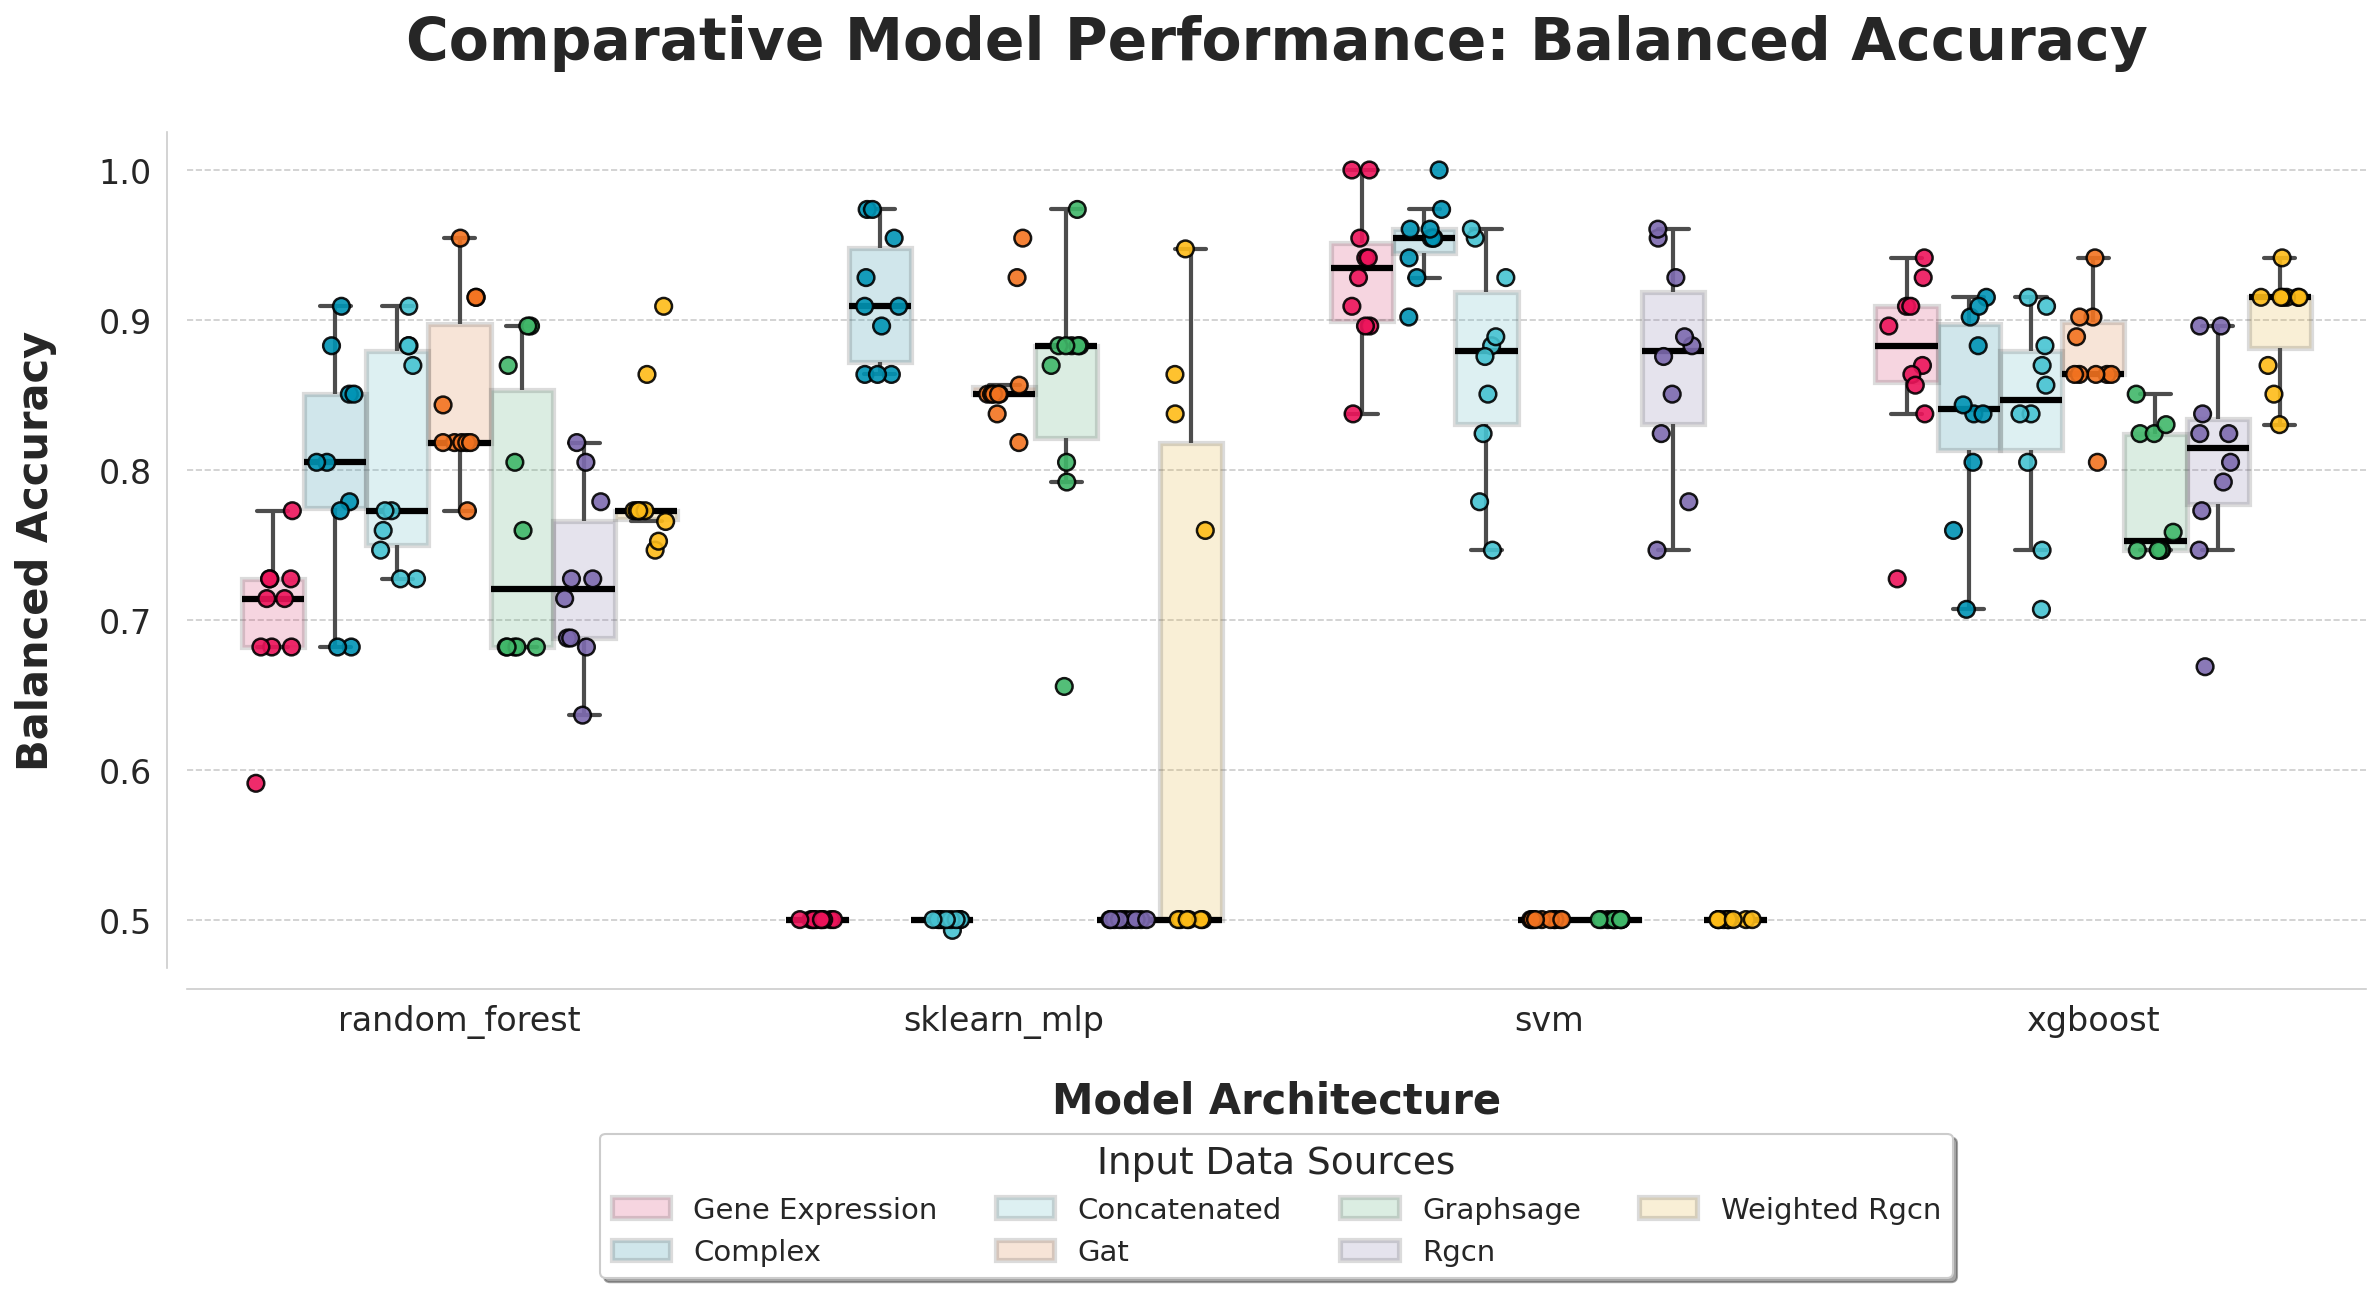

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Colors & Layout Setup ---
SECONDARY_COLORS = {
    1: "#C60B46", 2: "#ED145B", 3: "#EE3524", 4: "#F37320",
    5: "#7C2A90", 6: "#7D6AAF", 7: "#C6671D", 8: "#FEBC18",
    9: "#004E7D", 10: "#0E87C9", 11: "#0094B5", 12: "#46C3D2",
    13: "#00807A", 14: "#40B769", 15: "#8CC63E", 16: "#D5DF3D"
}

dataset_colors = {
    'gene_expression': SECONDARY_COLORS[2],
    'Complex_protein_embeddings': SECONDARY_COLORS[11],
    'GAT_protein_embeddings': SECONDARY_COLORS[4],
    'GraphSAGE_protein_embeddings': SECONDARY_COLORS[14],
    'RGCN_protein_embeddings': SECONDARY_COLORS[6],
    'weighted_RGCN_protein_embeddings': SECONDARY_COLORS[8],
    'concatenated_protein_embeddings': SECONDARY_COLORS[12]
}

# Poster Style Configuration
sns.set_style("whitegrid", {'axes.grid': True, 'grid.linestyle': '--'})
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.weight': 'medium',
    'axes.labelweight': 'bold',
    'figure.dpi': 150  # Better resolution for previewing
})

fig, ax = plt.subplots(figsize=(16, 9))
metric = 'balanced_accuracy'

# --- 2. Bold Boxplot (The Foundation) ---
sns.boxplot(
    data=all_df,
    x='model',
    y=metric,
    hue='input',
    palette=dataset_colors,
    showfliers=False,
    width=0.8,
    linewidth=2.5,        # Thicker lines for poster visibility
    boxprops={'alpha': 0.2, 'edgecolor': '0.3'}, # Faded boxes make points the "star"
    whiskerprops={'linewidth': 2, 'color': '0.3'},
    capprops={'linewidth': 2, 'color': '0.3'},
    medianprops={'linewidth': 3, 'color': 'black'}, # Strong median line
    ax=ax
)

# --- 3. Bold Stripplot (The High-Impact Points) ---
sns.stripplot(
    data=all_df,
    x='model',
    y=metric,
    hue='input',
    palette=dataset_colors,
    dodge=True,
    size=8,               # Significantly larger points
    alpha=0.9,
    jitter=0.25,
    linewidth=1.2,        # Thick border around each point
    edgecolor='black',    # Black edge makes colors vibrate/pop
    ax=ax
)

# --- 4. Poster Text Hierarchy ---
ax.set_title(f'Comparative Model Performance: {metric.replace("_", " ").title()}', 
             fontsize=28, weight='bold', pad=35)
ax.set_xlabel('Model Architecture', fontsize=20, labelpad=20)
ax.set_ylabel(metric.replace('_', ' ').title(), fontsize=20, labelpad=20)

# Increase tick size so they are legible from 4-5 feet away
ax.tick_params(axis='both', which='major', labelsize=16)

# --- 5. Clean & Large Legend ---
handles, labels = ax.get_legend_handles_labels()
n_datasets = all_df['input'].nunique()

# Advanced label cleaning: removes 'protein embeddings' and uses Title Case
labels_clean = [l.split('_protein')[0].replace('_', ' ').title() for l in labels[:n_datasets]]

legend = ax.legend(
    handles[:n_datasets], 
    labels_clean, 
    title='Input Data Sources', 
    title_fontsize=18,
    bbox_to_anchor=(0.5, -0.18),
    loc='upper center',
    ncol=4,
    frameon=True,
    shadow=True,          # Adds a bit of depth for poster interest
    fontsize=14,
    facecolor='white'
)

sns.despine(offset=10, trim=False)
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

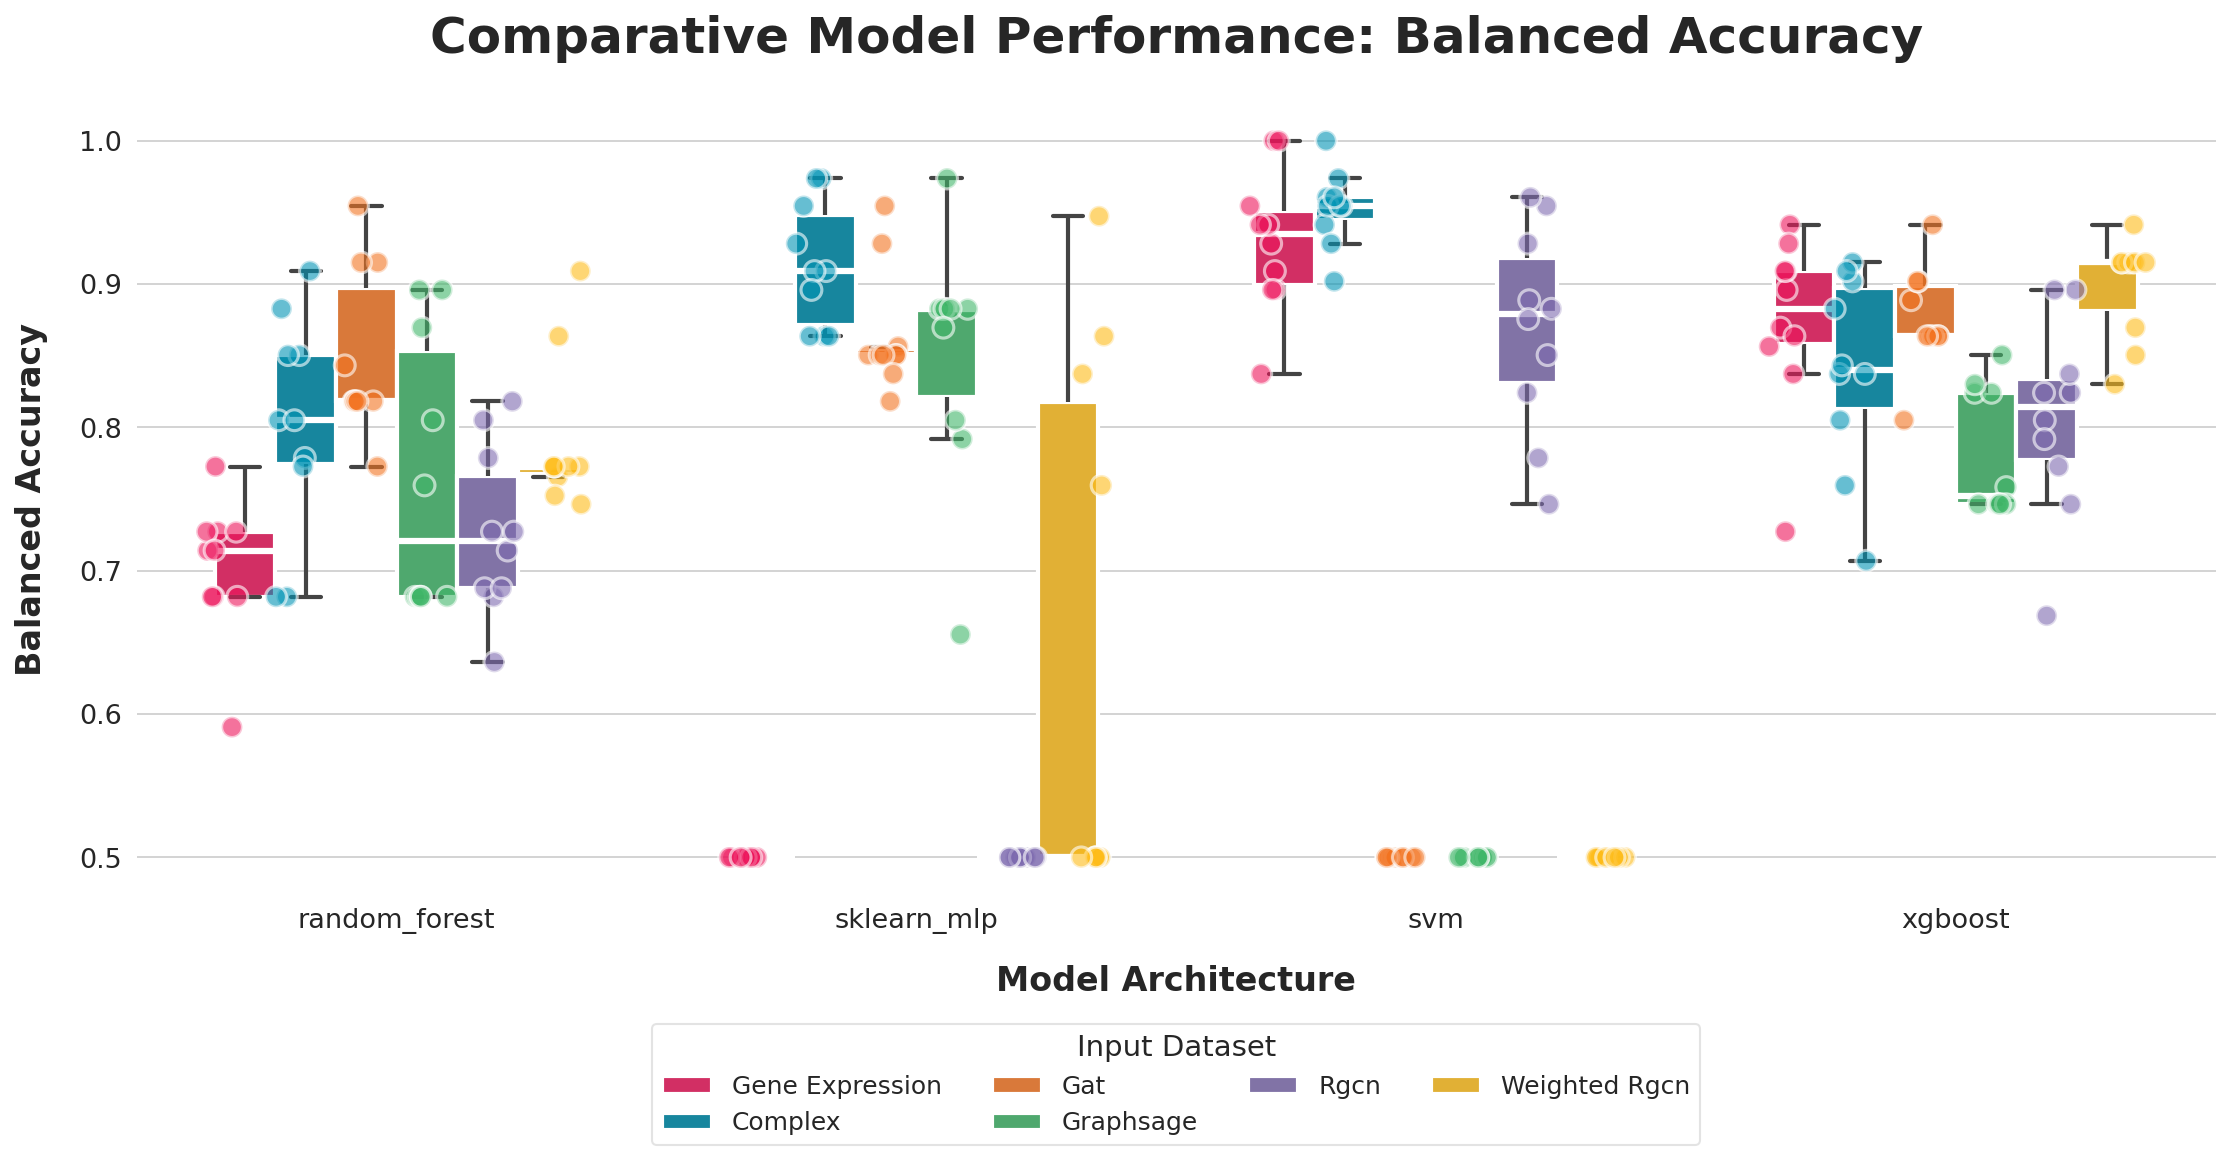

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Colors & Plot Config ---
SECONDARY_COLORS = {
    1: "#C60B46", 2: "#ED145B", 3: "#EE3524", 4: "#F37320",
    5: "#7C2A90", 6: "#7D6AAF", 7: "#C6671D", 8: "#FEBC18",
    9: "#004E7D", 10: "#0E87C9", 11: "#0094B5", 12: "#46C3D2",
    13: "#00807A", 14: "#40B769", 15: "#8CC63E", 16: "#D5DF3D"
}

dataset_colors = {
    'gene_expression': SECONDARY_COLORS[2],
    'Complex_protein_embeddings': SECONDARY_COLORS[11],
    'GAT_protein_embeddings': SECONDARY_COLORS[4],
    'GraphSAGE_protein_embeddings': SECONDARY_COLORS[14],
    'RGCN_protein_embeddings': SECONDARY_COLORS[6],
    'weighted_RGCN_protein_embeddings': SECONDARY_COLORS[8],
    'concatenated_protein_embeddings': SECONDARY_COLORS[12]
}

sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold'
})

fig, ax = plt.subplots(figsize=(15, 8))
metric = 'balanced_accuracy'

# --- 2. Solid Boxplot (The "Anchor") ---
sns.boxplot(
    data=all_df,
    x='model',
    y=metric,
    hue='input',
    palette=dataset_colors,
    showfliers=False,      # Hide outliers because stripplot shows all data
    width=0.7,
    linewidth=2,
    boxprops={'alpha': 1.0, 'edgecolor': 'white'}, # Solid colors, white border for "pop"
    medianprops={'color': 'white', 'linewidth': 3}, # White median for high contrast
    whiskerprops={'color': '#444444'},
    capprops={'color': '#444444'},
    ax=ax
)

# --- 3. Transparent Points (The "Detail") ---
# Using dodge=True to align with boxes
sns.stripplot(
    data=all_df,
    x='model',
    y=metric,
    hue='input',
    palette=dataset_colors,
    dodge=True,
    size=10,                # Larger for poster visibility
    alpha=0.6,             # Translucency for density tracking
    jitter=0.2,
    linewidth=1.5,         # Thin border
    edgecolor='white',     # WHITE edge makes transparent points pop on solid boxes
    ax=ax
)

# --- 4. Poster Polish & Labels ---
ax.set_title(f'Comparative Model Performance: {metric.replace("_", " ").title()}', 
             fontsize=24, pad=25)
ax.set_xlabel('Model Architecture', fontsize=16, labelpad=15)
ax.set_ylabel(metric.replace('_', ' ').title(), fontsize=16, labelpad=15)

# Tidy up ticks
ax.tick_params(axis='both', labelsize=13)
sns.despine(left=True, bottom=True)

# --- 5. Professional Legend ---
# Get handles/labels and filter out the duplicates from stripplot
handles, labels = ax.get_legend_handles_labels()
n_inputs = all_df['input'].nunique()

# Clean labels: remove suffixes and underscores
clean_labels = [l.split('_protein')[0].replace('_', ' ').title() for l in labels[:n_inputs]]

ax.legend(
    handles[:n_inputs], 
    clean_labels, 
    title='Input Dataset', 
    title_fontsize=14,
    fontsize=12,
    bbox_to_anchor=(0.5, -0.15),
    loc='upper center',
    ncol=4,
    frameon=True,
    facecolor='white',
    edgecolor='#dddddd'
)

plt.tight_layout()
# Recommended for posters:
# plt.savefig('poster_plot.pdf', bbox_inches='tight') 
plt.show()

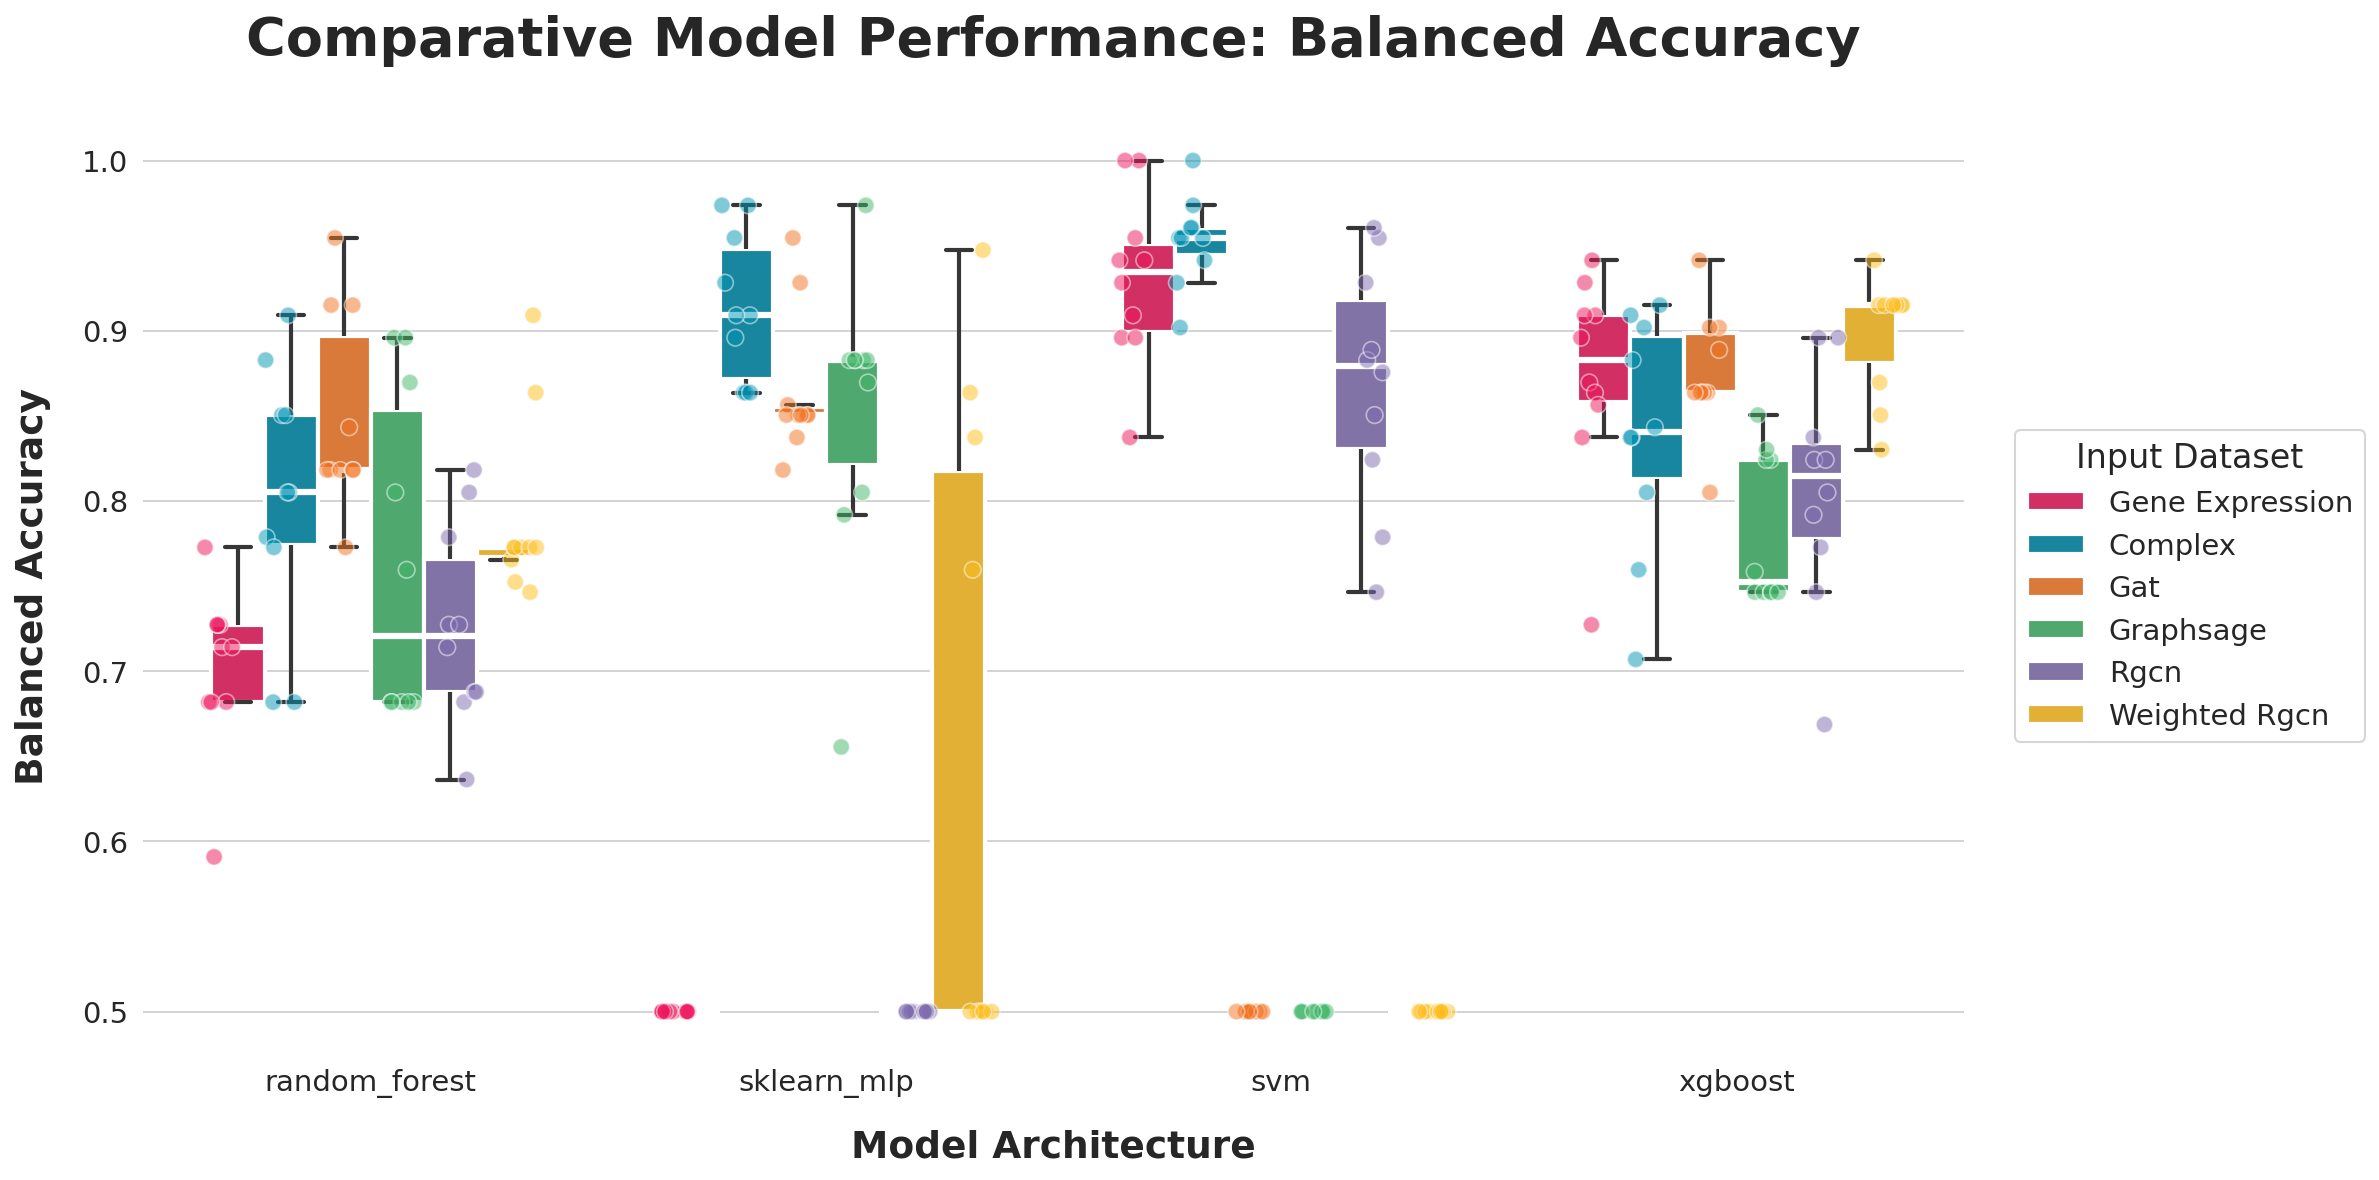

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Colors & Style ---
SECONDARY_COLORS = {
    1: "#C60B46", 2: "#ED145B", 3: "#EE3524", 4: "#F37320",
    5: "#7C2A90", 6: "#7D6AAF", 7: "#C6671D", 8: "#FEBC18",
    9: "#004E7D", 10: "#0E87C9", 11: "#0094B5", 12: "#46C3D2",
    13: "#00807A", 14: "#40B769", 15: "#8CC63E", 16: "#D5DF3D"
}

dataset_colors = {
    'gene_expression': SECONDARY_COLORS[2],
    'Complex_protein_embeddings': SECONDARY_COLORS[11],
    'GAT_protein_embeddings': SECONDARY_COLORS[4],
    'GraphSAGE_protein_embeddings': SECONDARY_COLORS[14],
    'RGCN_protein_embeddings': SECONDARY_COLORS[6],
    'weighted_RGCN_protein_embeddings': SECONDARY_COLORS[8],
    'concatenated_protein_embeddings': SECONDARY_COLORS[12]
}

sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'sans-serif',
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold'
})

# Adjusted figsize to accommodate the legend on the side
fig, ax = plt.subplots(figsize=(16, 8))
metric = 'balanced_accuracy'

# --- 2. Solid Boxplot ---
sns.boxplot(
    data=all_df,
    x='model',
    y=metric,
    hue='input',
    palette=dataset_colors,
    showfliers=False,
    width=0.7,
    linewidth=2,
    boxprops={'alpha': 1.0, 'edgecolor': 'white'},
    medianprops={'color': 'white', 'linewidth': 3},
    ax=ax
)

# --- 3. Transparent Points with White Outlines ---
sns.stripplot(
    data=all_df,
    x='model',
    y=metric,
    hue='input',
    palette=dataset_colors,
    dodge=True,
    size=8,              # Bold size for posters
    alpha=0.5,           # High transparency for overlapping detail
    jitter=0.2,
    linewidth=0.8,
    edgecolor='white',   # Essential for points to "pop" on solid boxes
    ax=ax
)

# --- 4. Title & Labels ---
ax.set_title(f'Comparative Model Performance: {metric.replace("_", " ").title()}', 
             fontsize=26, pad=30)
ax.set_xlabel('Model Architecture', fontsize=18, labelpad=15)
ax.set_ylabel(metric.replace('_', ' ').title(), fontsize=18, labelpad=15)
ax.tick_params(axis='both', labelsize=14)

# --- 5. Vertical Side Legend ---
handles, labels = ax.get_legend_handles_labels()
n_inputs = all_df['input'].nunique()
clean_labels = [l.split('_protein')[0].replace('_', ' ').title() for l in labels[:n_inputs]]

# Move legend to the right center
legend = ax.legend(
    handles[:n_inputs], 
    clean_labels, 
    title='Input Dataset', 
    title_fontsize=16,
    fontsize=14,
    bbox_to_anchor=(1.02, 0.5), # Positions it just outside the right axis
    loc='center left',         # Centers it vertically
    frameon=True,
    fancybox=True,             # Rounded corners
    shadow=False,
    edgecolor='#CCCCCC'
)

# --- 6. Final Layout Touches ---
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Save for printing (use PDF for vector quality or PNG with 300 DPI)
# plt.savefig('poster_figure.png', dpi=300, bbox_inches='tight')
plt.show()

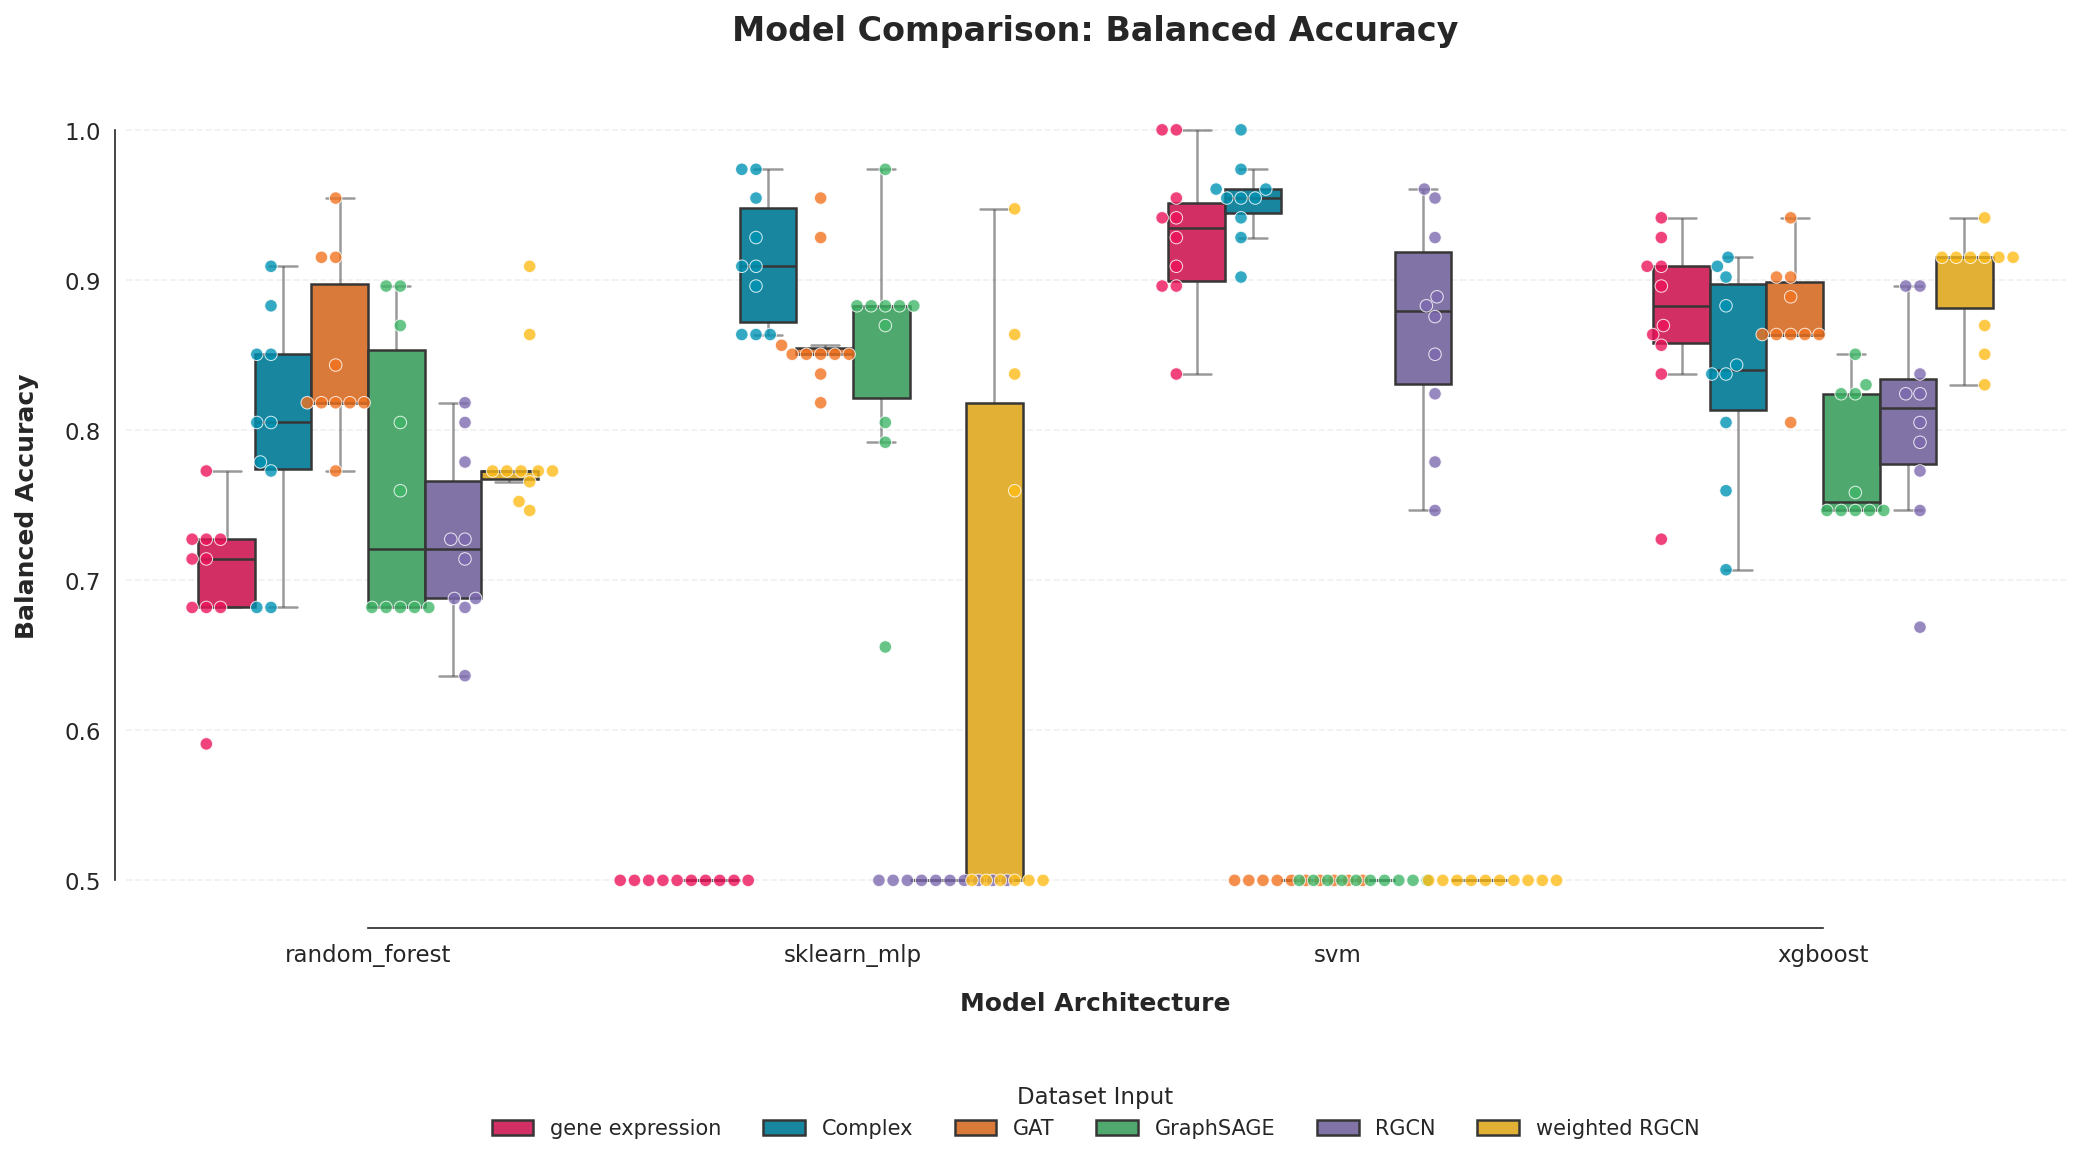

In [24]:

# 2. Setup Plot Style
metric = 'balanced_accuracy'
sns.set_style("white") 
plt.rcParams.update({'font.family': 'sans-serif', 'font.size': 11})

fig, ax = plt.subplots(figsize=(14, 8))

# 3. Boxplot (The "Background" stats)
sns.boxplot(
    data=all_df,
    x='model',
    y=metric,
    hue='input',
    palette=dataset_colors,
    showfliers=False,    # Hidden because swarmplot shows all points
    width=0.7,
    linewidth=1.2,
    boxprops={'alpha': 1}, # Light boxes to let points shine
    whiskerprops={'alpha': 0.5},
    capprops={'alpha': 0.5},
    ax=ax
)

# 4. Swarm Plot (The "Foreground" density)
# This arranges points in an ordered "beeswarm" from left to right
sns.swarmplot(
    data=all_df,
    x='model',
    y=metric,
    hue='input',
    palette=dataset_colors,
    dodge=True,        # CRITICAL: aligns points to the specific hue box
    size=6,            # Adjust size if points overlap too much
    alpha=0.8,
    edgecolor='white', # High-contrast edge for a professional look
    linewidth=0.5,
    ax=ax,
    legend=False       # Don't double the legend
)

# 5. Refining the Layout
ax.set_title(f'Model Comparison: {metric.replace("_", " ").title()}', 
             fontsize=16, weight='bold', pad=25)
ax.set_xlabel('Model Architecture', fontsize=12, labelpad=12)
ax.set_ylabel(metric.replace('_', ' ').title(), fontsize=12, labelpad=12)

# Professional Grid and Spine cleanup
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
sns.despine(trim=True, offset=5)

# 6. Clean Legend
handles, labels = ax.get_legend_handles_labels()
n_datasets = all_df['input'].nunique()
labels_clean = [l.replace('_protein_embeddings', '').replace('_', ' ') for l in labels[:n_datasets]]

ax.legend(
    handles[:n_datasets], 
    labels_clean, 
    title='Dataset Input', 
    bbox_to_anchor=(0.5, -0.18),
    loc='upper center',
    ncol=6,
    frameon=False,
    fontsize=10
)

plt.tight_layout()
plt.show()

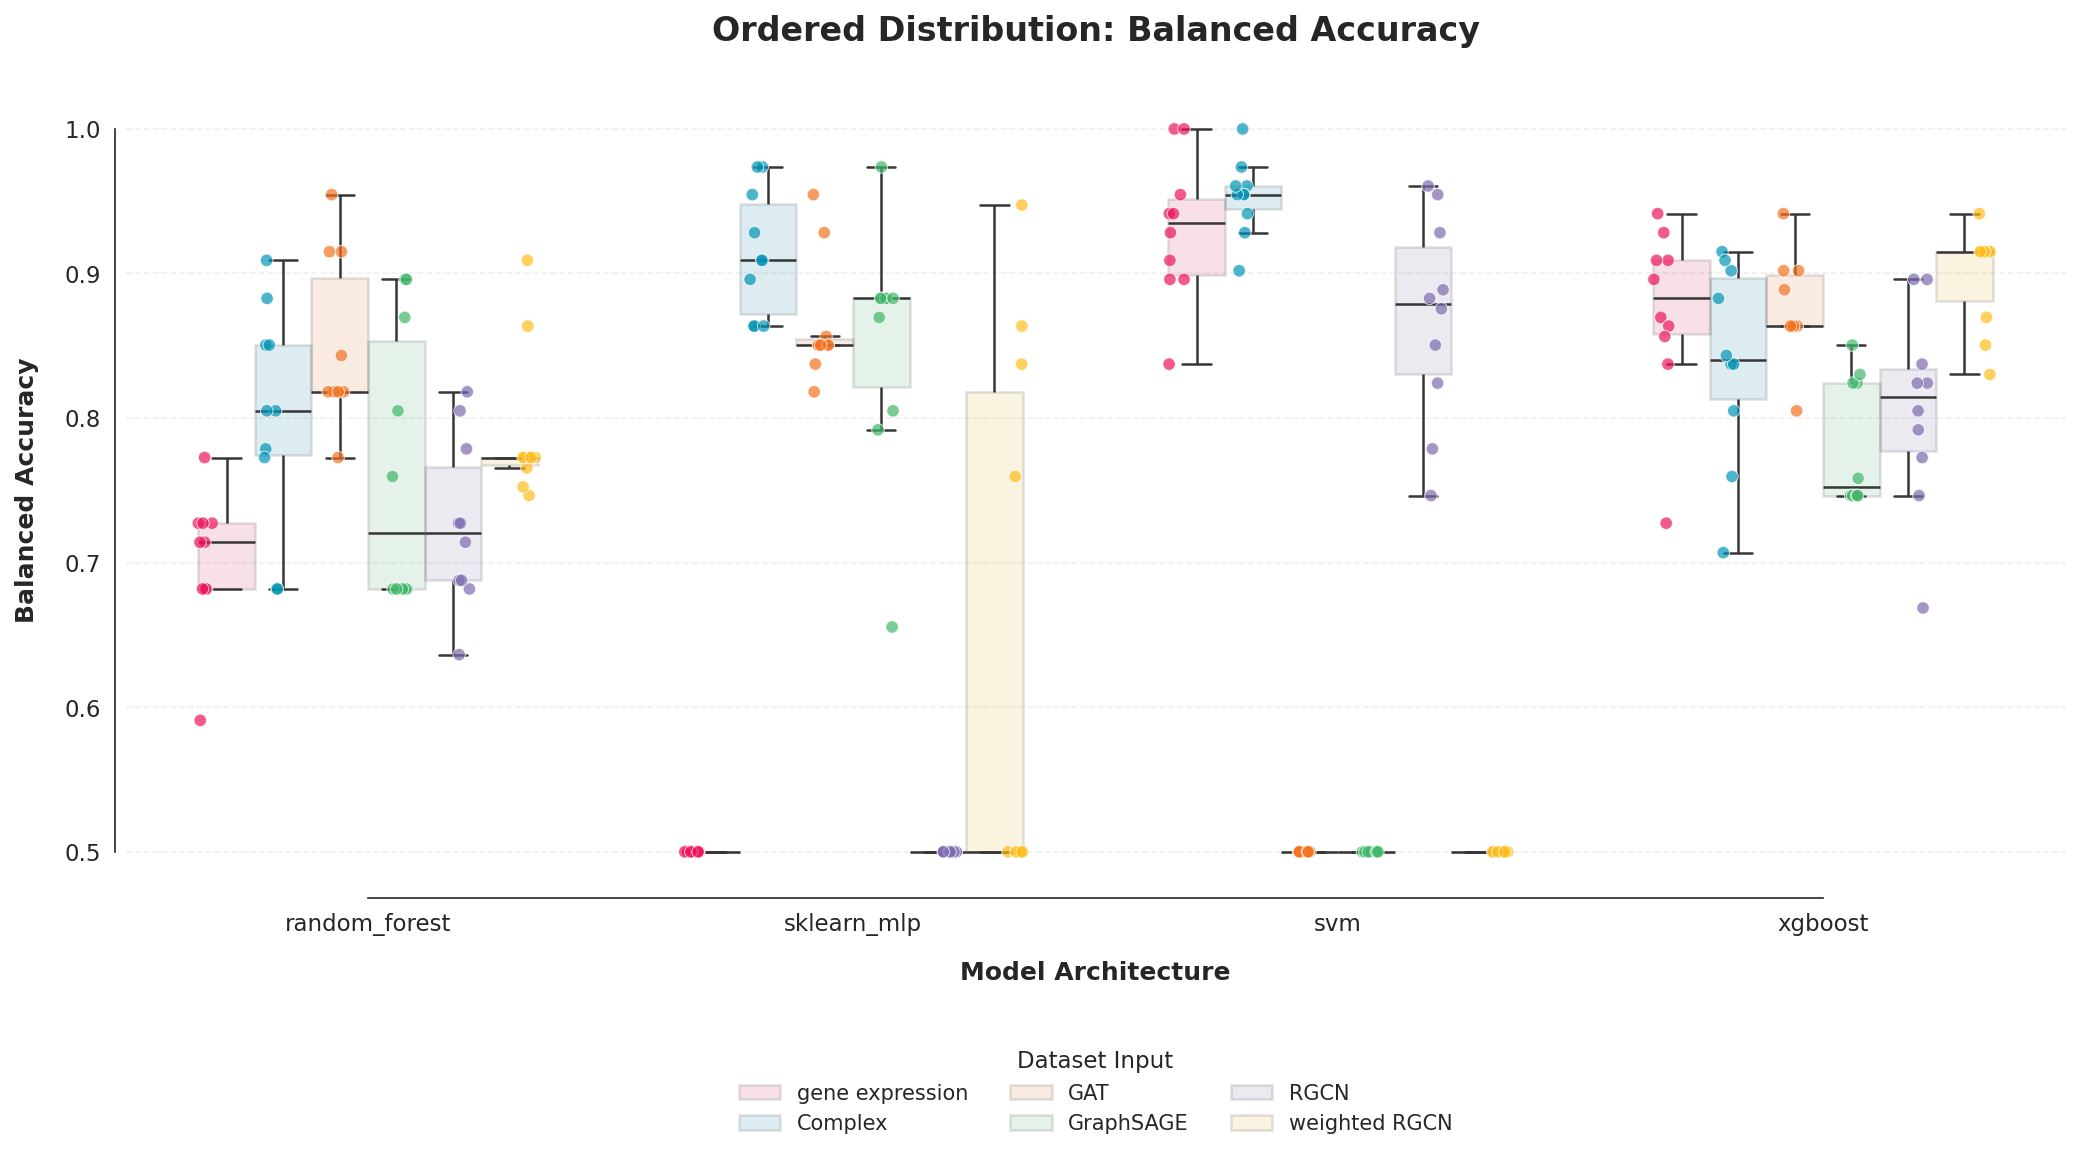

In [25]:


metric = 'balanced_accuracy'

# 2. Setup Plot Style
sns.set_style("white")
plt.rcParams.update({'font.family': 'sans-serif', 'font.size': 11})

fig, ax = plt.subplots(figsize=(14, 8))

# 3. Create Boxplot
sns.boxplot(
    data=all_df,
    x='model',
    y=metric,
    hue='input',
    palette=dataset_colors,
    showfliers=False,
    width=0.7,
    linewidth=1.2,
    boxprops={'alpha': 0.15}, # Very light box so dots are the focus
    ax=ax
)

# 4. Manual Slanted Jitter Logic
# We calculate a 'horizontal_offset' based on the metric value
# This makes points move from left to right as they go up
def add_slanted_jitter(df, metric_col, jitter_strength=0.15):
    # Normalize the metric to a 0-1 range for the jitter calculation
    min_val = df[metric_col].min()
    max_val = df[metric_col].max()
    # Apply a linear shift + a tiny bit of random noise for overlap prevention
    return ((df[metric_col] - min_val) / (max_val - min_val) - 0.5) * jitter_strength

# Applying the jitter to the plot using stripplot's underlying logic
# We use 'native_scale' if available, or just use the hue dodge
sns.stripplot(
    data=all_df,
    x='model',
    y=metric,
    hue='input',
    palette=dataset_colors,
    dodge=True,
    jitter=0.1,        # Minimal random jitter
    size=6,
    alpha=0.7,
    edgecolor='white',
    linewidth=0.5,
    ax=ax
)

# Note: While Seaborn doesn't natively support "diagonal" jitter in one line, 
# the swarmplot from the previous step is the standard way to show ordered density.
# If you want a strict "diagonal line" effect, we would use ax.scatter() manually.

# 5. Refining the Layout
ax.set_title(f'Ordered Distribution: {metric.replace("_", " ").title()}', 
             fontsize=16, weight='bold', pad=25)
ax.set_xlabel('Model Architecture', fontsize=12, labelpad=12)
ax.set_ylabel(metric.replace('_', ' ').title(), fontsize=12, labelpad=12)

# Professional Grid and Spine cleanup
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
sns.despine(trim=True, offset=5)

# 6. Clean Legend
handles, labels = ax.get_legend_handles_labels()
n_datasets = all_df['input'].nunique()
labels_clean = [l.replace('_protein_embeddings', '').replace('_', ' ') for l in labels[:n_datasets]]

ax.legend(
    handles[:n_datasets], 
    labels_clean, 
    title='Dataset Input', 
    bbox_to_anchor=(0.5, -0.18),
    loc='upper center',
    ncol=3,
    frameon=False,
    fontsize=10
)

plt.tight_layout()

plt.savefig('../../../results/figures/metrics/protein_robustness_boxplot.png', dpi=120, bbox_inches='tight')

plt.show()